# COMP 562

Plan for today

1. Review logistic regression
2. Multi-class logistic regression and softmax 
3. Big data and mini-batch stochastic gradient descent 

$$
\renewcommand{\xx}{\mathbf{x}}
\renewcommand{\yy}{\mathbf{y}}
\renewcommand{\zz}{\mathbf{z}}
\renewcommand{\vv}{\mathbf{v}}
\renewcommand{\bbeta}{\boldsymbol{\mathbf{\beta}}}
\renewcommand{\loglik}{\mathcal{LL}}
\renewcommand{\penloglik}{\mathcal{PLL}}
\renewcommand{\likelihood}{\mathcal{L}}
\renewcommand{\Data}{\textrm{Data}}
\renewcommand{\given}{ \big| }
\renewcommand{\MLE}{\textrm{MLE}}
\renewcommand{\tth}{\textrm{th}}
\renewcommand{\Gaussian}[2]{\mathcal{N}\left(#1,#2\right)}
\renewcommand{\norm}[1]{\left\lVert#1\right\rVert}
\renewcommand{\ones}{\mathbf{1}}
\renewcommand{\diag}[1]{\textrm{diag}\left( #1 \right)}
\renewcommand{\sigmoid}[1]{\sigma\left(#1\right)}
\renewcommand{\myexp}[1]{\exp\left\{#1\right\}}
\renewcommand{\mylog}[1]{\log\left\{#1\right\}}
$$

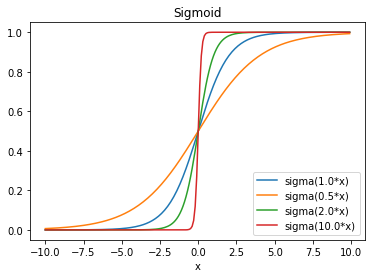

In [1]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
x = numpy.arange(-10,10,0.1)
scales = [1.0,0.5,2.0,10.0]
labels = []
for s in scales:
    plt.plot(x,1.0/(1.0 + numpy.exp(-s*x)))
    labels.append('sigma(' + str(s) +'*x)')
plt.xlabel('x')
plt.title('Sigmoid')
plt.legend(labels,loc=4)

# Logistic regression -- log-likelihood for $\pm$ 1 labels

Probability of a single sample is when $y \in \{-1,+1\}$:
$$
p(y\given\xx,\beta_0,\beta) = \frac{1}{1 + \myexp{-y(\beta_0 + \xx^T\beta)}}
$$

Likelihood function is:
$$
\likelihood(\beta_0,\beta\given\yy,\xx) = \prod_i \frac{1}{1 + \myexp{-y_i(\beta_0 + \xx_i^T\beta)}}
$$

Log-likelihood function is:
$$
\loglik(\beta_0,\beta\given\yy,\xx) = -\sum_i \log\left\{1 + \myexp{-y_i(\beta_0 + \xx_i^T\beta)} \right\}
$$

Ridge regularized log-likelihood:
$$
\penloglik(\beta_0,\beta\given\yy,\xx) = -\sum_i \log\left\{1 + \myexp{-y_i(\beta_0 + \xx_i^T\beta)} \right\} - \frac{\lambda}{2}\norm{\beta}^2
$$



# Logistic regression -- log-likelihood for $0,1$ labels

Probability of a single sample is when $y \in \{0,1\}$:
$$
p(y\given\xx,\beta_0,\beta) = \frac{\myexp{y(\beta_0 + \xx^T\beta)}}{1 + \myexp{(\beta_0 + \xx^T\beta)}}
$$

Likelihood function is:
$$
\likelihood(\beta_0,\beta\given\yy,\xx) = \prod_i \frac{\myexp{y_i(\beta_0 + \xx_i^T\beta)}}{1 + \myexp{(\beta_0 + \xx^T\beta)}}
$$

Log-likelihood function is:
$$
\loglik(\beta_0,\beta\given\yy,\xx) = \sum_i y_i(\beta_0 + \xx_i^T\beta) - \log\left\{1 + \myexp{(\beta_0 + \xx_i^T\beta)} \right\}
$$

Ridge regularized log-likelihood:
$$
\penloglik(\beta_0,\beta\given\yy,\xx) =  \sum_i y_i(\beta_0 + \xx_i^T\beta) - \log\left\{1 + \myexp{(\beta_0 + \xx_i^T\beta)} \right\} - \frac{\lambda}{2}\norm{\beta}^2
$$



# Decision boundary -- Separating hyperplane

For Logistic regression:
$$p(y=1\given\xx,\beta,\beta_0) = 0.5 \iff \beta_0 + \xx^T\beta = 0$$

![Separating Hyperplane](separating.png)

# Multiclass classification

Given a feature vector $\xx$ we wish to predict which of the $C$ classes it came from.
If $C=2$ we can use logistic regression. What if $C>2$?

Q: Suggest how you might use a two class classifier in training a multiclass classifier? Hint: you can train more than one two-class classifier and aggregate their predictions.



# Multiclass classification

We need to specify 
$$
p(y=1\given\xx),p(y=2\given\xx),...,p(y=C\given\xx)
$$
where we note that
$$
\begin{aligned}
\sum_{c=1}^C p(y=c\given\xx) &= 1.0 \\
p(y=c\given\xx)&\geq 0,& 1\leq c\leq C
\end{aligned}
$$

# Softmax

Sigmoid:
$$
\sigma(z) = \frac{1}{1 + \myexp{-z}} = \frac{\myexp{z}}{1 + \myexp{z}}
$$

Softmax is a generalization of sigmoid:
$$
\sigma(\zz)_j = \frac{\myexp{z_j}}{\sum_{c=1}^C \myexp{z_j}}
$$
For example:
$$
\begin{aligned}
\sigma(\zz)_1 &= \frac{\myexp{z_1}}{\myexp{z_1} + \myexp{z_2} + \myexp{z_3}} \\
\sigma(\zz)_2 &= \frac{\myexp{z_2}}{\myexp{z_1} + \myexp{z_2} + \myexp{z_3}} \\
\sigma(\zz)_3 &= \frac{\myexp{z_3}}{\myexp{z_1} + \myexp{z_2} + \myexp{z_3}} 
\end{aligned}
$$

# Why is it called softmax?

Imagine a function that gives back an indicator vector where $1$ for the largest entry, $0$ for others.

For example, $[0.1, 0.5, 0.3]$ would map to $[0,1,0]$ because the second entry is the largest.

Softmax maps input values into probabilities. The largest value is mapped into the largest probability, but no probability is 0. 

Hence, softmax is a "soft" version of the above max function.


In [2]:
# why softmax
from __future__ import print_function
import numpy
def hardmax(z):
    m = numpy.max(z)
    h = numpy.double(z == m)
    print("z: ",z,"Hardmax(z):",h)
    return h

def softmax(z,verbose=True):
    s = numpy.exp(z)
    s = s/numpy.sum(s)
    if verbose:
        print("z: ",z,"Softmax(z):",s)
    return s

hardmax([0.1,0.5,0.3])
softmax([0.1,0.5,0.3])
softmax([0.01,0.05,0.03])
softmax([10,50,30])
softmax([50,50,30]);


z:  [0.1, 0.5, 0.3] Hardmax(z): [ 0.  1.  0.]
z:  [0.1, 0.5, 0.3] Softmax(z): [ 0.2693075   0.40175958  0.32893292]
z:  [0.01, 0.05, 0.03] Softmax(z): [ 0.32668933  0.34002178  0.33328889]
z:  [10, 50, 30] Softmax(z): [  4.24835425e-18   9.99999998e-01   2.06115362e-09]
z:  [50, 50, 30] Softmax(z): [  4.99999999e-01   4.99999999e-01   1.03057681e-09]


# Softmax and temperature

Note that
$$
\sigmoid{\zz} \neq \sigmoid{\frac{1}{T}\zz}, T \neq 1
$$

In fact, for small $T$ the softmax output approaches the indicator vector which tells you which entries are the largest.

Hence softmax can be made arbirarily "sharp" or "peaked" by scaling its inputs.

BTW. If you've done any simulated annealing, you have been using softmax and tuning the temperature up to drive the algorithm to find the maximum.




[array([ 0.85397529]), array([ 0.84656149])]


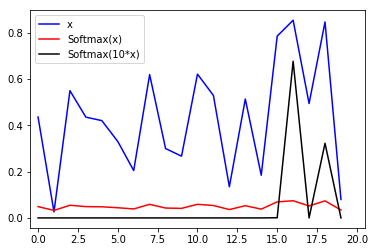

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
numpy.random.seed(2)
x = numpy.random.rand(20,1)
plt.plot(x,'b',label='x')
plt.plot(softmax(x,verbose=False),'r',label='Softmax(x)')
plt.plot(softmax(100.0*x,verbose=False),'k',label='Softmax(10*x)');
plt.xlim([-0.5,20.5])
plt.legend(loc=0)
print([x[16],x[18]])

# Multiclass logistic regression and softmax

We can write out probability of partcular class using softmax
$$
p(y=c\given\xx,\beta_0,B) = \boxed{\frac{ \myexp{\beta_{0,c} + \xx^T\bbeta_c}}{\sum_{k=1}^C\myexp{\beta_{0,k} + \xx^T\bbeta_k}}}
$$
where
$$
B = \left[\bbeta_1 \bbeta_2 ... \bbeta_C \right]
$$
and each $\bbeta_c$ is a vector of class specific feature weights.


Note that the $p(y=c\given\cdots)$ is a categorical distribution over $C$ possible states. Probabilities of each state are given by softmax.




# Excess of parameters

Probability of a single sample in logistic regression assuming where $y \in \{1,2\}$
$$
\begin{aligned}
p(y=1\given\xx,\beta_0,\beta) &= \frac{1}{1 + \myexp{\beta_0 + \xx^T\beta)}}\\
p(y=2\given\xx,\beta_0,\beta) &= \frac{\myexp{\beta_0 + \xx^T\beta}}{1 + \myexp{\beta_0 + \xx^T\beta}}
\end{aligned}
$$

But in our multiclass logistic regression for $C=2$ we have
$$
\begin{aligned}
p(y=1\given\xx,\beta_0,B) &\propto \frac{ \myexp{\beta_{0,1} + \xx^T\bbeta_1}}{\myexp{\beta_{0,1} + \xx^T\bbeta_1} + \myexp{\beta_{0,2} + \xx^T\bbeta_2}} \\
p(y=2\given\xx,\beta_0,B) &= \frac{ \myexp{\beta_{0,2} + \xx^T\bbeta_2}}{\myexp{\beta_{0,1} + \xx^T\bbeta_1} + \myexp{\beta_{0,2} + \xx^T\bbeta_2}} \\
\end{aligned}
$$

Multiclass logistic regression for $C=2$ has more paramters than logistic regresssion. 

Q: Do we need these parameters? If not, why not and how do we get rid of them? Just need intuition here, we will work it out on the board.



# Counting parameters

$$
p(y=c\given\xx,\beta_0,B) = \boxed{\frac{ \myexp{\beta_{0,c} + \xx^T\bbeta_c}}{\sum_{k=1}^C\myexp{\beta_{0,k} + \xx^T\bbeta_k}}} 
$$

If there are $C$ classes and $p$ features

Q: Size of $\beta_0$? 

Q: Size of $$
B = \left[\bbeta_1 \bbeta_2 ... \bbeta_C \right]
$$ 
matrix of $\bbeta$ vectors? 

Q: Assuming that $\beta_{0,C} = 0$ and $\bbeta_{j,C} = 0$, total parameter count is? 

# One-hot representation of labels

Thus far we have been using a random variable $y$ and writing probabilities as
$$
p(y = c\given \cdots) = 
$$


If you give me a discrete variable $z \in \{1,...C\}$ I can construct a C-long binary vector
$$
y_c = \left\{ \begin{aligned}
 1,&& z=c\\
0, && z \neq c
\end{aligned}
\right.
$$
This bit vector is **one-hot** representation of original variable $z$.

For example, if C = 5
1. $z = 3$ then  $y = [0 0 1 0 0]$
2. $z = 2$ then  $y = [0 1 0 0 0]$
3. $z = 4$ then   $y = [0 0 0 1 0]$, and $$
\prod_{c=1}^C \theta_c^{y_c} = \theta_1^0\theta_2^0\theta_3^0\theta_4^{\color{red}{1}}\theta_5^0=\theta_4
$$
and
$$
\log\prod_{c=1}^C \theta_c^{y_c} = \sum_c y_c \log \theta_c = \log \theta_4
$$


# Log-Likelihood

1. There are $N$ samples, each in one of $C$ classes, and $p$ features
2. Labels are represented using one-hot vectors $y_i$
3. Feature matrix $X$ contains a column of 1s -- corresponding to the bias term.
4. First row of weight matrix $B$ are bias terms.
5. $\bbeta_{k}$ is $k^\tth$ column of matrix $B$

|   |Variable   |Dimensions |
|---|:---:|:-----:|
|feature matrix| $X$ | $N\times (p+1)$ |
| label matrix |$Y$ | $N\times C$| 
| weight matrix| $B$ | $(p+1)\times C$|



Likelihood is 
$$
\likelihood(B\given Y,X) = \underbrace{\prod_{i=1}^N}_{\textrm{samples}}\underbrace{\prod_{c=1}^C}_{\textrm{classes}}\left[\frac{ \myexp{\xx_i^T\bbeta_c}}{\sum_{k=1}^C\myexp{\xx_i^T\bbeta_k}}\right]^{y_{i,c}}
$$
Log-likelihood is
$$
\loglik(\beta_0,B\given Y,X) = \sum_{i=1}^N
\sum_{c=1}^C y_{i,c}\left(\xx_i^T\bbeta_c - \mylog{\sum_{k=1}^C\myexp{\xx_i^T\bbeta_k}} \right)
$$



# Ridge regularized log-likelihood


Ridge regularized log-likelihood
$$
\begin{aligned}
\penloglik(B\given Y,X) =& \sum_{i=1}^N
\sum_{c=1}^C y_{i,c}\left(\xx_i^T\bbeta_c - \mylog{\sum_{k=1}^C\myexp{\xx_i^T\bbeta_k}} \right)\\ &- \frac{\lambda}{2}\sum_{k=1}^C \sum_{j=1}^p \beta_{j,k}^2
\end{aligned}
$$

Note that we keep the last column of $B$ fixed at 0 to get rid of excess parameters. 

These parameters will not contribute to the regularization -- sum of their squares is 0.




# Cross-entropy

Frequently you will encounter mentions of cross-entropy. It is the negative log likelihood of multiclass logistic regression

$$
\begin{aligned}
\textrm{crossentropy}(B) &= -\loglik(B\given Y,X)\\& = -\sum_{i=1}^N
\sum_{c=1}^C y_{i,c}\left(\xx_i^T\bbeta_c - \mylog{\sum_{k=1}^C\myexp{\xx_i^T\bbeta_k}} \right)
\end{aligned}
$$

Ridge regularized cross-entropy 
$$
\begin{aligned}
\textrm{crossentropy}(B) =& -\sum_{i=1}^N \sum_{c=1}^C y_{i,c}\left(\xx_i^T\bbeta_c - \mylog{\sum_{k=1}^C\myexp{\xx_i^T\bbeta_k}} \right) \\ 
&{\color{red}{+}}\frac{\lambda}{2}\sum_{k=1}^C \sum_{j=1}^p \beta_{j,k}^2
\end{aligned}
$$

Note the sign flip in the regularization. 


# Gradients of log-likelihood
We will work this out in a pedestrian fashion and then obtain a compact expression:
$$
\loglik(B)=\sum_{i=1}^N \sum_{c=1}^C y_{i,c}\left(\underbrace{\xx_i^T\bbeta_c}_{\textrm{involves only $\beta_c$}} - \underbrace{\mylog{\sum_{k=1}^C\myexp{\xx_i^T\bbeta_k}}}_{\textrm{involves all columns of $B$}} \right) 
$$
Break it down
$$
\begin{aligned}
\loglik(B)&=\sum_{i=1}^N \sum_{c=1}^C y_{i,c}\left(\xx_i^T\bbeta_c\right)
\\
&-\sum_{i=1}^N \sum_{c=1}^C y_{i,c}\underbrace{\mylog{\sum_{k=1}^C\myexp{\xx_i^T\bbeta_k}}}_{\textrm{does not involve c}}
\end{aligned}
$$
Hence
$$
\begin{aligned}
\loglik(B)&=\sum_{i=1}^N \sum_{c=1}^C y_{i,c}\left(\xx_i^T\bbeta_c\right)\\
&-\sum_{i=1}^N\mylog{\sum_{k=1}^C\myexp{\xx_i^T\bbeta_k}}
\end{aligned}
$$



On board we will work out 
$$
\frac{\partial}{\partial \beta_{j,l}}\mylog{\sum_{k=1}^C\myexp{\xx_i^T\bbeta_k}} = \boxed{\frac{\myexp{\xx_i^T\bbeta_l}}{\sum_{k=1}^C\myexp{\xx_i^T\bbeta_k}}}x_{i,j}
$$

Hence 
$$
\begin{aligned}
\frac{\partial}{\partial\beta_{j,l}} \loglik(B) &= \sum_i y_{i,l}x_{i,j}\\
&-\sum_{i=1}^N \frac{\myexp{\xx_i^T\bbeta_l}}{\sum_{k=1}^C\myexp{\xx_i^T\bbeta_k}}x_{i,j}
\end{aligned}
$$

For compactness, the model's probability of class $l$ for sample $i$ will be denoted $\mu_{i,l}$

$$
\mu_{i,l} = \frac{\myexp{\xx_i^T\bbeta_l}}{\sum_{k=1}^C\myexp{\xx_i^T\bbeta_k}}
$$
and
$$
\frac{\partial}{\partial\beta_{j,l}} \loglik(B) = \sum_i y_{i,l}x_{i,j}
-\sum_{i=1}^N \mu_{i,l}x_{i,j} = \sum_i x_{i,j}\underbrace{(y_{i,l} - \mu_{i,l})}_{\textrm{residual}}
$$

$$
\frac{\partial}{\partial\beta_{j,l}} \loglik(B) = \sum_i \underbrace{x_{i,j}}_{\textrm{feature $j$}}\underbrace{(y_{i,l} - \mu_{i,l})}_{\textrm{residual in predicting class $l$}} = \xx_{:,j}^T(\yy_{:,l} - \mu_{:,l})
$$

In words, partial derivative of log-likelihood with respect to $j^\tth$ feature's weight for class $l$ is inner product between the feature and disagreement between prediction and the true label.

Gradient of log likelihood with respect to a column of $B$
$$
\nabla_{\beta_c} \loglik(B) = \sum_i (y_{i,c} - \mu_{i,c})\xx_i
$$

Gradient of ridge regularized log-likelihood with respect to a column of $B$

$$
\nabla_{\beta_c} \penloglik(B) = \sum_i (y_{i,c} - \mu_{i,c})\xx_i - \lambda\left[\begin{aligned}0\\\ \bbeta_c\end{aligned}\right]
$$

# BigData and stochastic gradient

If the number of samples $N$ is in thousands rather than millions then computation of gradients like
$$
\begin{aligned}
\mu_{i,l} &= \frac{\myexp{\xx_i^T\bbeta_l}}{\sum_{k=1}^C\myexp{\xx_i^T\bbeta_k}}\\
\nabla_{\beta_c} \loglik(B) &= \sum_i (y_{i,c} - \mu_{i,c})\xx_i
\end{aligned}
$$
is not overly expensive. 

Methods that use the whole dataset on every update of parameters are called **batch** methods.




# BigData and stochastic gradient

Once the number of samples becomes large iterating over all of them has diminishing returns.

Stochastic gradient methods compute gradients using a portion of data called **mini-batches**.

An extreme example of this is **online learning** -- data is streamed one sample at a time.

# BigData and stochastic gradient

Updating parameters based on a small set of data is not guaranteed to monotonically improve log-likelihood.

Hence, step-size cannot be chosen using line-search. 

Instead, step sizes for each iteration $k$ are computed 
$$
\begin{aligned}
s^{(k)} &= \left(s^{(k-1)}\right)^{1-\epsilon} & \epsilon \in [0,1]\\
s^{(k)} &= \frac{1}{\tau + k} & \tau > 0 
\end{aligned}
$$
and lead to diminishing step-size.

In [ ]:
def stochastic_gradient_ascent(f,x,get_next_batch,iters,epsilon=0.99):    
    for it in range(iters):
        batch = get_next_batch()
        v,g = f(x,batch)    
        x = x + step*g
        step = step**(1.0 - epsilon)
    return x

def stochastic_gradient_descent(f,x,get_next_batch,iters,epsilon=0.99):    
    for it in range(iters):
        batch = get_next_batch()
        v,g = f(x,batch)    
        x = x - step*g
        step = step**(1.0 - epsilon)
    return x


![](SGD.png)

# Today

Softmax -- generalization of sigmoid.

Multiclass classification using logistic regression.

Started looking at stochastic gradients and big data.